In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import MissingIndicator

In [2]:
# to do

# clean up dataset once and for all
# add methods used for cleaning
# add del statements

In [3]:
# NOTES
#

In [4]:
# load data into a DataFrame object
df = pd.read_csv('data/kc_house_Data.csv')

In [5]:
# split df into categorical and numerical variable types
df = df.drop(['id'], axis=1)
df_num = df.select_dtypes(include=np.number)
df_cat = df.drop(df_num.columns, axis=1)

In [6]:
# clean up df_cat
df_cat['sqft_basement'] = df_cat['sqft_basement'].replace(to_replace='?', value=np.nan)
df_cat['sqft_basement'] = pd.to_numeric(df_cat['sqft_basement'])
df_num['sqft_basement'] = df_cat['sqft_basement']
df_cat = df_cat.drop(['sqft_basement'], axis = 1)

df_cat['grade'] = df_cat['grade'].map(lambda x: int(x[0]))

df_cat['month_sold'] = df_cat['date'].map(lambda x: int(x.split('/')[0]))
df_cat['year_sold'] = df_cat['date'].map(lambda x: int(x.split('/')[-1]))
df_cat = df_cat.drop(['date'], axis=1)

<ipython-input-6-3bd482b1fbeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['sqft_basement'] = df_cat['sqft_basement']


In [7]:
waterfront = df_cat[['waterfront']]
missing_indicator = MissingIndicator()
missing_indicator.fit(waterfront)
waterfront_missing = missing_indicator.transform(waterfront)
df_cat["waterfront_missing"] = waterfront_missing

df_cat['waterfront'] = df_cat['waterfront'].fillna('NO')
df_cat.waterfront = df_cat.waterfront.eq('YES').mul(1)

In [8]:
condition_dummies = pd.get_dummies(df_cat['condition'], prefix='cond_', drop_first=True)

df_cat = df_cat.drop(['condition'], axis=1)
df_cat = pd.concat([df_cat, condition_dummies], axis=1)

In [9]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   waterfront          21597 non-null  int64 
 1   view                21534 non-null  object
 2   grade               21597 non-null  int64 
 3   month_sold          21597 non-null  int64 
 4   year_sold           21597 non-null  int64 
 5   waterfront_missing  21597 non-null  bool  
 6   cond__Fair          21597 non-null  uint8 
 7   cond__Good          21597 non-null  uint8 
 8   cond__Poor          21597 non-null  uint8 
 9   cond__Very Good     21597 non-null  uint8 
dtypes: bool(1), int64(4), object(1), uint8(4)
memory usage: 949.2+ KB


In [10]:
df_cat.view.isna().sum()

63

In [11]:
df_cat.view = df_cat.view.fillna('NONE')

In [12]:
view_dummies = pd.get_dummies(df_cat.view, prefix='view_', drop_first=True)
df_cat = df_cat.drop(['view'], axis=1)
df_cat = pd.concat([df_cat, view_dummies], axis=1)

In [13]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   waterfront          21597 non-null  int64
 1   grade               21597 non-null  int64
 2   month_sold          21597 non-null  int64
 3   year_sold           21597 non-null  int64
 4   waterfront_missing  21597 non-null  bool 
 5   cond__Fair          21597 non-null  uint8
 6   cond__Good          21597 non-null  uint8
 7   cond__Poor          21597 non-null  uint8
 8   cond__Very Good     21597 non-null  uint8
 9   view__EXCELLENT     21597 non-null  uint8
 10  view__FAIR          21597 non-null  uint8
 11  view__GOOD          21597 non-null  uint8
 12  view__NONE          21597 non-null  uint8
dtypes: bool(1), int64(4), uint8(8)
memory usage: 864.8 KB


In [14]:
df_num.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_basement     454
dtype: int64

In [15]:
df_num.sqft_basement = df_num.sqft_basement.fillna(0)

/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df_num.yr_renovated = df_num.yr_renovated.fillna(0)

In [17]:
df_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [18]:
df_final = pd.concat([df_num, df_cat], axis=1)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21597 non-null  float64
 1   bedrooms            21597 non-null  int64  
 2   bathrooms           21597 non-null  float64
 3   sqft_living         21597 non-null  int64  
 4   sqft_lot            21597 non-null  int64  
 5   floors              21597 non-null  float64
 6   sqft_above          21597 non-null  int64  
 7   yr_built            21597 non-null  int64  
 8   yr_renovated        21597 non-null  float64
 9   zipcode             21597 non-null  int64  
 10  lat                 21597 non-null  float64
 11  long                21597 non-null  float64
 12  sqft_living15       21597 non-null  int64  
 13  sqft_lot15          21597 non-null  int64  
 14  sqft_basement       21597 non-null  float64
 15  waterfront          21597 non-null  int64  
 16  grad

In [20]:
df_final.to_csv('data/df_untransformed.csv', index=False)

In [21]:
!ls

README.md                      data_preprocessing-noble.ipynb
Untitled.ipynb                 data_preprocessing.ipynb
data                           notebook_main.ipynb


In [22]:
!cd data

In [23]:
!ls data

column_names.md      df_untransformed.csv kc_house_data.csv


In [ ]:
res = np.sum((y_predicted - y_real)**2)
res = round(rss, 2)


tot = np.sum((np.mean(y_real) - y_real)**2)
r_squared = round(1 - res/tot, 2)

In [25]:
df_train = df.sample(frac=0.8, random_state=2)
df_test = df.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

(array([1.740e+02, 1.174e+03, 2.471e+03, 2.613e+03, 2.421e+03, 1.951e+03,
        1.623e+03, 1.180e+03, 9.340e+02, 7.190e+02, 4.780e+02, 3.330e+02,
        1.930e+02, 1.340e+02, 1.410e+02, 1.070e+02, 1.030e+02, 7.000e+01,
        6.000e+01, 6.200e+01, 3.500e+01, 5.700e+01, 2.700e+01, 3.100e+01,
        2.400e+01, 1.400e+01, 7.000e+00, 1.800e+01, 1.400e+01, 1.300e+01,
        1.300e+01, 1.400e+01, 1.000e+01, 3.000e+00, 5.000e+00, 3.000e+00,
        3.000e+00, 6.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 0.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

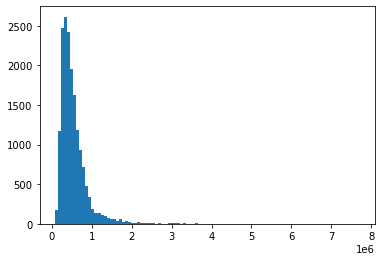

In [28]:
fig, ax = plt.subplots()

ax.hist(y_train, bins=100)

<AxesSubplot:>

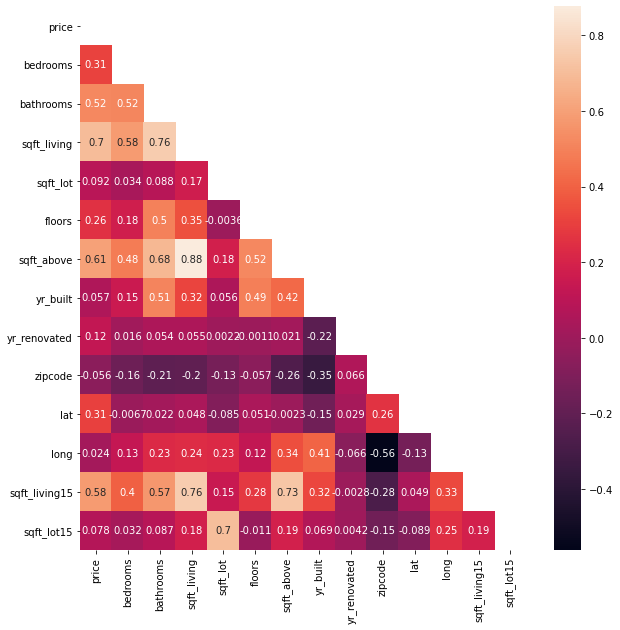

In [31]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

most_correlated_feature = 'sqft_living'
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4922939341679502
Validation score: 0.49241336038410877


In [53]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [54]:
df.shape

(21597, 20)